<a href="https://colab.research.google.com/github/sohag221/Fake-News-Detection/blob/main/Copy_of_FakeNewDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Link With Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Import Necessary Library**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve, classification_report
from sklearn.metrics import RocCurveDisplay
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

import plotly.express as px
import string
import warnings

warnings.filterwarnings('ignore')


**Load dataset**

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Statistical dataset/WELFake_Dataset.csv")

In [ ]:
data

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1
...,...,...,...,...
72129,72129,Russians steal research on Trump in hack of U....,WASHINGTON (Reuters) - Hackers believed to be ...,0
72130,72130,WATCH: Giuliani Demands That Democrats Apolog...,"You know, because in fantasyland Republicans n...",1
72131,72131,Migrants Refuse To Leave Train At Refugee Camp...,Migrants Refuse To Leave Train At Refugee Camp...,0
72132,72132,Trump tussle gives unpopular Mexican leader mu...,MEXICO CITY (Reuters) - Donald Trump’s combati...,0


In [ ]:
data['text'][0] #label 1 (Real news)

'No comment is expected from Barack Obama Members of the #FYF911 or #FukYoFlag and #BlackLivesMatter movements called for the lynching and hanging of white people and cops. They encouraged others on a radio show Tuesday night to  turn the tide  and kill white people and cops to send a message about the killing of black people in America.One of the F***YoFlag organizers is called  Sunshine.  She has a radio blog show hosted from Texas called,  Sunshine s F***ing Opinion Radio Show. A snapshot of her #FYF911 @LOLatWhiteFear Twitter page at 9:53 p.m. shows that she was urging supporters to  Call now!! #fyf911 tonight we continue to dismantle the illusion of white Below is a SNAPSHOT Twitter Radio Call Invite   #FYF911The radio show aired at 10:00 p.m. eastern standard time.During the show, callers clearly call for  lynching  and  killing  of white people.A 2:39 minute clip from the radio show can be heard here. It was provided to Breitbart Texas by someone who would like to be referred to

In [ ]:
data['text'][72131] # label 0(spam news)

'Migrants Refuse To Leave Train At Refugee Camp In Hungary\n\nThousands of migrants flooded into a train station in the Hungarian capital Thursday after police lifted a two-day blockade, but some who boarded a train they thought was going to Germany ended up instead at a refugee camp just miles from Budapest.\n\nThe Associated Press reports that "excited migrants piled into a newly arrived train at the Keleti station in Hungary\'s capital despite announcements in Hungarian and English that all services from the station to Western Europe had been canceled. A statement on the main departures board said no more trains to Austria or Germany would depart \'due to safety reasons until further notice!\'\n\n"Many migrants, who couldn\'t understand either language and were receiving no advice from Hungarian officials, scrambled aboard in a standing-room-only crush and hoped for the best," the AP said.\n\nScuffles broke out when police ordered the passengers off the train at Bicske, according to

In [ ]:
data.drop('Unnamed: 0' , axis =1,inplace = True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72134 entries, 0 to 72133
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   71576 non-null  object
 1   text    72095 non-null  object
 2   label   72134 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


**Dataset Preprocessing**

In [ ]:
data.isnull().sum()

,0
title,558
text,39
label,0


In [ ]:
data.fillna(' ',inplace=True)

In [ ]:
features = data[['title','text']]
labels = data['label']

In [ ]:
labels

,label
0,1
1,1
2,1
3,0
4,1
...,...
72129,0
72130,1
72131,0
72132,0


In [ ]:
features

,title,text
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...
1,,Did they post their votes for Hillary already?
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ..."
3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...
4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will..."
...,...,...
72129,Russians steal research on Trump in hack of U....,WASHINGTON (Reuters) - Hackers believed to be ...
72130,WATCH: Giuliani Demands That Democrats Apolog...,"You know, because in fantasyland Republicans n..."
72131,Migrants Refuse To Leave Train At Refugee Camp...,Migrants Refuse To Leave Train At Refugee Camp...
72132,Trump tussle gives unpopular Mexican leader mu...,MEXICO CITY (Reuters) - Donald Trump’s combati...


In [ ]:
data.isnull().sum()

,0
title,0
text,0
label,0


In [ ]:
import plotly.express as px

# Count occurrences of each unique label
label_status = data['label'].value_counts()
transactions = label_status.index
quantity = label_status.values

# Calculate percentage
percentages = (quantity / quantity.sum()) * 100

# Create a bar chart with percentages displayed
figure = px.bar(
    x=transactions,
    y=percentages,  # Use percentages instead of counts
    title="Label Distribution (%)",
    labels={'x': 'Transaction Labels', 'y': 'Percentage (%)'},
    text=[f'{p:.2f}%' for p in percentages],  # Format as percentage with 2 decimals
)

# Show the figure
figure.show()


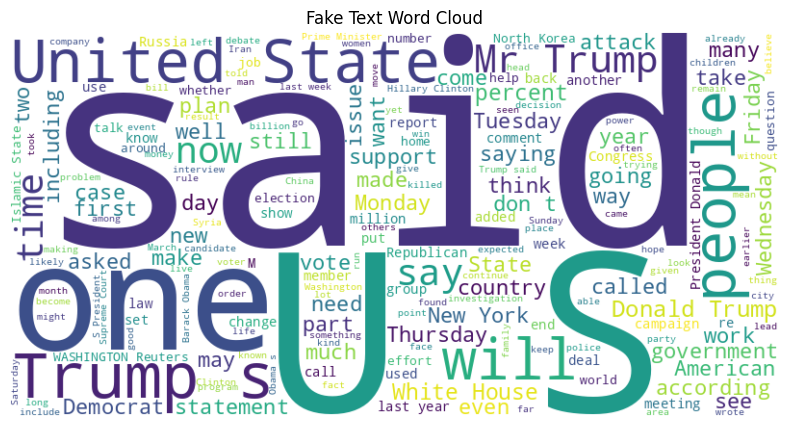

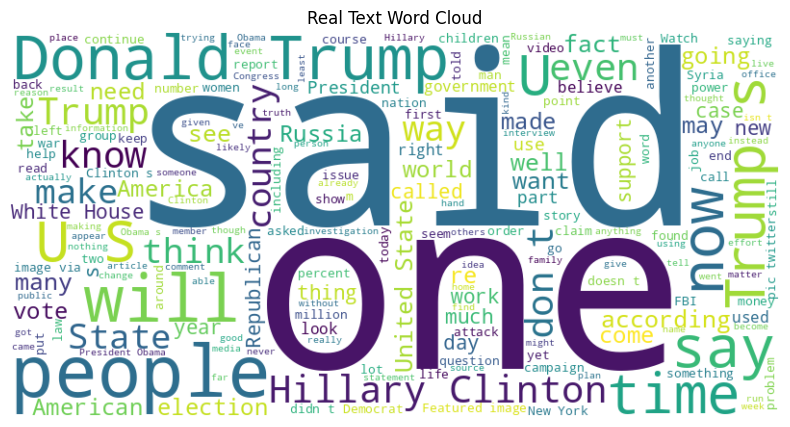

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

def plot_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# Creating text data for word clouds
fake_text = ' '.join(data[data['label'] == 0]['text'])
real_text = ' '.join(data[data['label'] == 1]['text'])

# Plotting word clouds
plot_wordcloud(fake_text, "Fake Text Word Cloud")
plot_wordcloud(real_text, "Real Text Word Cloud")


**Text Preprocessing**

In [ ]:
text_column = 'text'
label_column = 'label'

In [ ]:
# prompt: add code for stop word in english

import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    remove_punc = [char for char in text if char not in string.punctuation]
    clearn_word = ''.join(remove_punc)
    text = ([word for word in clearn_word.split() if word.lower() not in stop_words])
    return text




[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
data[text_column] = data[text_column].apply(preprocess_text)

In [ ]:
data[text_column]

,text
0,"[comment, expected, Barack, Obama, Members, FY..."
1,"[post, votes, Hillary, already]"
2,"[demonstrators, gathered, last, night, exercis..."
3,"[dozen, politically, active, pastors, came, pr..."
4,"[RS28, Sarmat, missile, dubbed, Satan, 2, repl..."
...,...
72129,"[WASHINGTON, Reuters, Hackers, believed, worki..."
72130,"[know, fantasyland, Republicans, never, questi..."
72131,"[Migrants, Refuse, Leave, Train, Refugee, Camp..."
72132,"[MEXICO, CITY, Reuters, Donald, Trump’s, comba..."


**Lemmatization**

In [ ]:
# prompt: add Lemmatization

# **Lemmatization**
def lemmatize_text(text):
    lemmatized_text =' '.join([lemmatizer.lemmatize(word) for word in text])
    return lemmatized_text

data[text_column] = data[text_column].apply(lemmatize_text)
data[text_column]


,text
0,comment expected Barack Obama Members FYF911 F...
1,post vote Hillary already
2,demonstrator gathered last night exercising co...
3,dozen politically active pastor came private d...
4,RS28 Sarmat missile dubbed Satan 2 replace SS1...
...,...
72129,WASHINGTON Reuters Hackers believed working Ru...
72130,know fantasyland Republicans never questioned ...
72131,Migrants Refuse Leave Train Refugee Camp Hunga...
72132,MEXICO CITY Reuters Donald Trump’s combative s...


**TF-IDF Vectorization**

In [ ]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data[text_column])
y = data[label_column]

In [ ]:
xtrian,xtest,ytrain,ytest=train_test_split(X,labels,test_size=0.3,random_state=42)

**Funtion For Evaluation of model.**

In [ ]:
def evaluate_model(model, xtest, ytest):
    ypred = model.predict(xtest)
    accuracy = accuracy_score(ytest, ypred)
    CM = confusion_matrix(ytest, ypred)
    classification_rep = classification_report(ytest, ypred)

    return {
        'Accuracy' : accuracy,
        'Confusion Matrix' :CM,
         'cassification Report of Model':classification_rep
        }

**Build Naie Bayas Models**

In [ ]:
mnb_model  = MultinomialNB(alpha=1.0,fit_prior=True,class_prior=None)
mnb_model.fit(xtrian,ytrain)

MultinomialNB()

In [ ]:
result=evaluate_model(mnb_model,xtest,ytest)
result

{'Accuracy': 0.8766692851531814,
 'Confusion Matrix': array([[9713,  900],
        [1769, 9259]]),
 'cassification Report of Model': '              precision    recall  f1-score   support\n\n           0       0.85      0.92      0.88     10613\n           1       0.91      0.84      0.87     11028\n\n    accuracy                           0.88     21641\n   macro avg       0.88      0.88      0.88     21641\nweighted avg       0.88      0.88      0.88     21641\n'}

**Evaluate Manually**

In [ ]:
cm = confusion_matrix(ytest,mnb_model.predict(xtest))
cm

array([[9713,  900],
       [1769, 9259]])

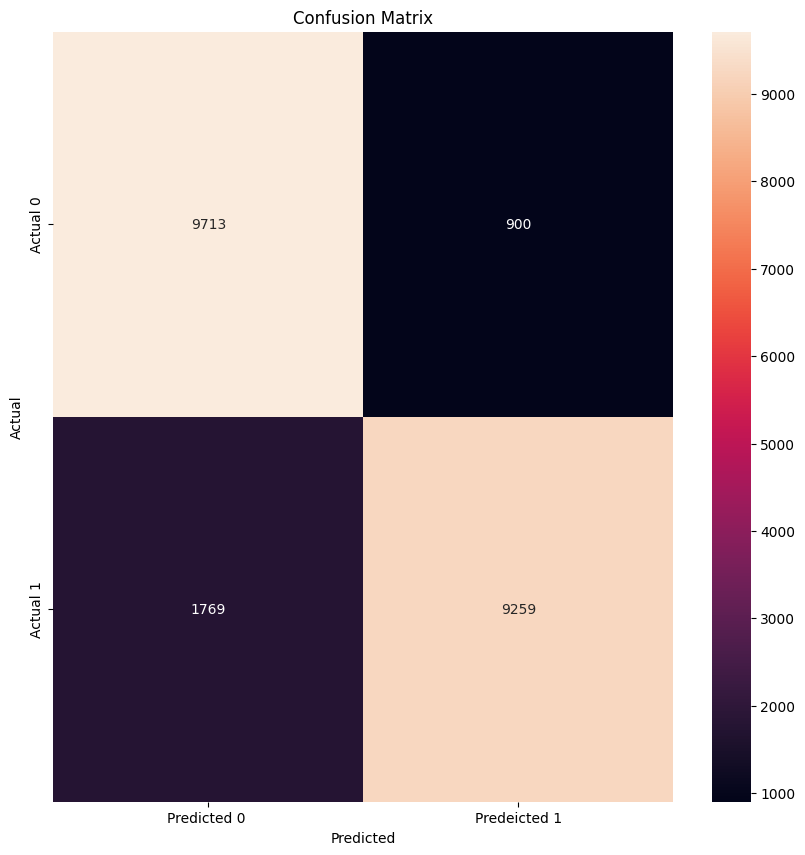

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(cm,annot=True,fmt='d',xticklabels = ['Predicted 0 ', 'Predeicted 1'],yticklabels = ['Actual 0','Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
print(classification_report(ytest,mnb_model.predict(xtest)))

              precision    recall  f1-score   support

           0       0.85      0.92      0.88     10613
           1       0.91      0.84      0.87     11028

    accuracy                           0.88     21641
   macro avg       0.88      0.88      0.88     21641
weighted avg       0.88      0.88      0.88     21641



**Bernoulli Naive Bayes**

In [ ]:
bnb_model = BernoulliNB(alpha=1.0,binarize=0.0, fit_prior=True,class_prior=None)
bnb_model.fit(xtrian,ytrain)

BernoulliNB()

In [ ]:
bresult = evaluate_model(bnb_model,xtest,ytest)
bresult

{'Accuracy': 0.8547664156000185,
 'Confusion Matrix': array([[8575, 2038],
        [1105, 9923]]),
 'cassification Report of Model': '              precision    recall  f1-score   support\n\n           0       0.89      0.81      0.85     10613\n           1       0.83      0.90      0.86     11028\n\n    accuracy                           0.85     21641\n   macro avg       0.86      0.85      0.85     21641\nweighted avg       0.86      0.85      0.85     21641\n'}

***Logistic Regression***

In [ ]:
lg_model = LogisticRegression(C=1.0,penalty='l2',solver='lbfgs',max_iter=1000)
lg_model.fit(xtrian,ytrain)

LogisticRegression(max_iter=1000)

In [ ]:
lg_result = evaluate_model(lg_model,xtest,ytest)
lg_result

{'Accuracy': 0.9503257705281641,
 'Confusion Matrix': array([[ 9956,   657],
        [  418, 10610]]),
 'cassification Report of Model': '              precision    recall  f1-score   support\n\n           0       0.96      0.94      0.95     10613\n           1       0.94      0.96      0.95     11028\n\n    accuracy                           0.95     21641\n   macro avg       0.95      0.95      0.95     21641\nweighted avg       0.95      0.95      0.95     21641\n'}

In [ ]:
lg_cm = confusion_matrix(ytest,lg_model.predict(xtest))
lg_cm

array([[ 9956,   657],
       [  418, 10610]])

**Input random text and prediction**

In [ ]:
models=[mnb_model,bnb_model,lg_model]

In [ ]:
random_Text = input("Enter random text : ")

preprocessed_text = preprocess_text(random_Text)
lemmatized_text = lemmatize_text(preprocessed_text)
vectorized_text = vectorizer.transform([lemmatized_text])

Enter random text : Migrants Refuse To Leave Train At Refugee Camp In Hungary  Thousands of migrants flooded into a train station in the Hungarian capital Thursday after police lifted a two-day blockade, but some who boarded a train they thought was going to Germany ended up instead at a refugee camp just miles from Budapest.  The Associated Press reports that "excited migrants piled into a newly arrived train at the Keleti station in Hungary's capital despite announcements in Hungarian and English that all services from the station to Western Europe had been canceled. A statement on the main departures board said no more trains to Austria or Germany would depart 'due to safety reasons until further notice!'  "Many migrants, who couldn't understand either language and were receiving no advice from Hungarian officials, scrambled aboard in a standing-room-only crush and hoped for the best," the AP said.  Scuffles broke out when police ordered the passengers off the train at Bicske, accor

In [ ]:
for model in models:
  prediction = model.predict(vectorized_text)
  print(f"Prediction using {model} : {prediction}")
  print()

Prediction using MultinomialNB() : [0]

Prediction using BernoulliNB() : [0]

Prediction using LogisticRegression(max_iter=1000) : [0]



**Save model(LogisticRegrassion)**

In [ ]:
import pickle

model_file_path = '/content/drive/MyDrive/Statistical dataset/model.pkl'
with open(model_file_path, 'wb') as model_file:
    pickle.dump(lg_model, model_file)